In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing dataset
data = pd.read_csv("HeartDisease.csv")

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# EDA

In [7]:
# Checking shape of data
data.shape 

(1025, 14)

In [8]:
# dataset information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
# data description 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# checking null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# checking number of unique value in dataset 
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [12]:
# checking unique value distribution
data.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [13]:
data.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [14]:
data.fbs.value_counts()

0    872
1    153
Name: fbs, dtype: int64

In [15]:
data.restecg.value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

In [16]:
data.exang.value_counts()

0    680
1    345
Name: exang, dtype: int64

In [17]:
data.slope.value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

In [18]:
data.ca.value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [19]:
data.thal.value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [20]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [21]:
# Separating Categorical and Continuous variable
categorical_val = []
continuous_val = []
for col in data.columns:
    if data[col].nunique() >= 10:
        continuous_val.append(col)
    else:
        categorical_val.append(col)

In [22]:
print(continuous_val)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [23]:
print(categorical_val)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


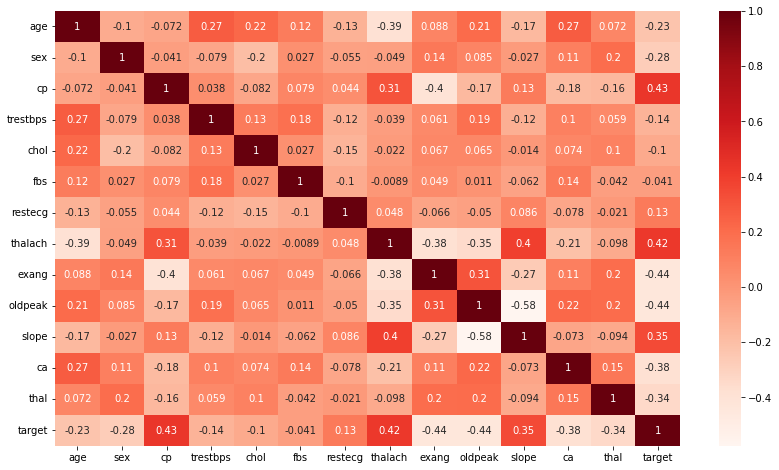

In [24]:
# data correlation
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot=True,cmap='Reds')
plt.show()

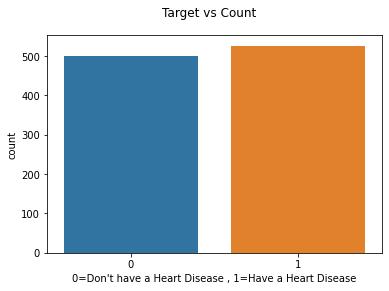

In [25]:
# Count plot of Target column
sns.countplot(x='target',data=data)
plt.suptitle("Target vs Count")
plt.xlabel("0=Don't have a Heart Disease , 1=Have a Heart Disease")
plt.show()

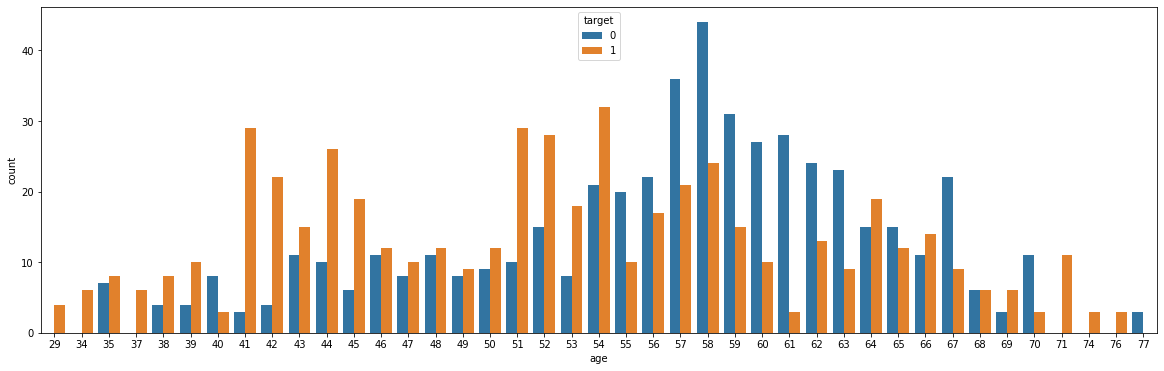

In [26]:
plt.figure(figsize=(20,6))
sns.countplot(x='age',hue='target',data=data)
plt.show()

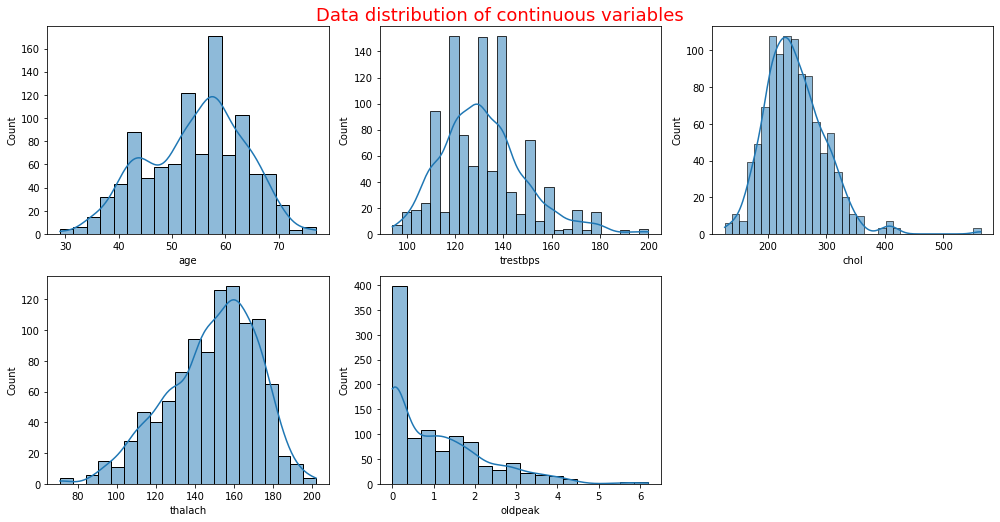

In [27]:
# hist plot of Continuous variable
plt.figure(figsize=(14,14))
for i ,col in enumerate(continuous_val):
    ax = plt.subplot(4,3,i+1)
    sns.histplot(x=col,data=data,kde=True)
plt.suptitle("Data distribution of continuous variables",fontsize=18,color='red')
plt.tight_layout()

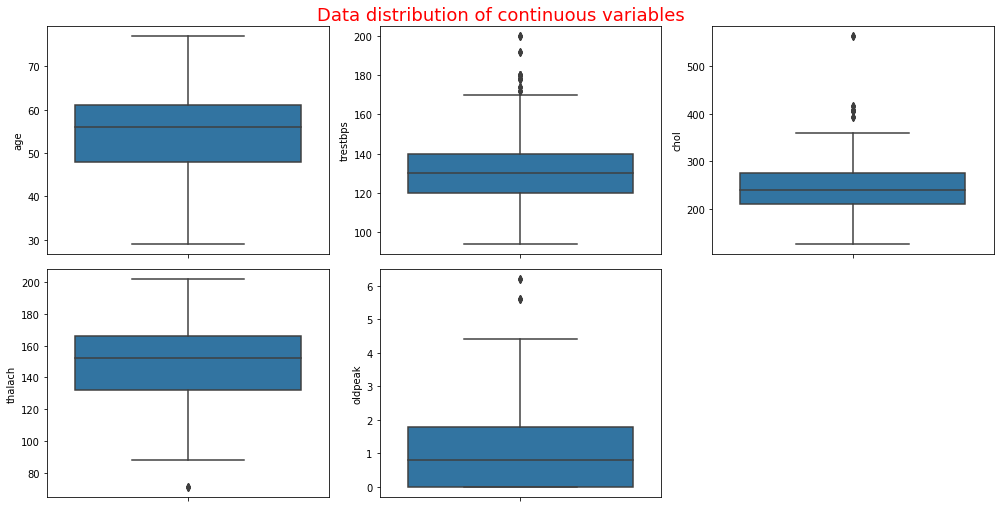

In [28]:
# Box plot of Continuous variable
plt.figure(figsize=(14,14))
for i ,col in enumerate(continuous_val):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(y=col,data=data)
plt.suptitle("Data distribution of continuous variables",fontsize=18,color='red')
plt.tight_layout()

In [29]:
# Removing outliers based on trestbps 
q1 = np.percentile(data['trestbps'],25)
q3 = np.percentile(data['trestbps'],75)
IQR = q3 - q1
lower_limit = int(q1 - (1.5*IQR))
upper_limit = int(q3 + (1.5*IQR))
print(f"Lower limit: {lower_limit}")
print(f"Upper limit: {upper_limit}")

Lower limit: 90
Upper limit: 170


In [30]:
Modified_data = data[data['trestbps']<upper_limit]

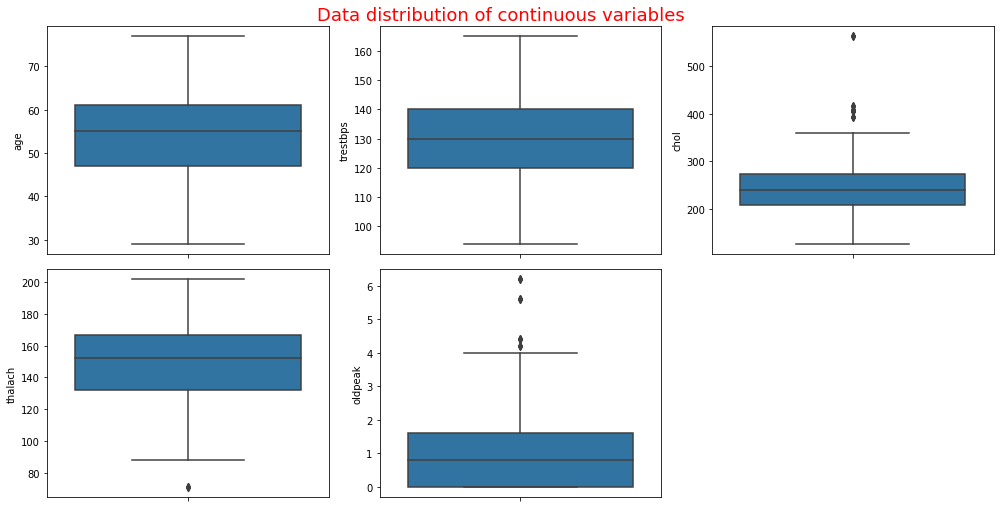

In [31]:
# Box plot after removing outliers
plt.figure(figsize=(14,14))
for i ,col in enumerate(continuous_val):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(y=col,data=Modified_data)
plt.suptitle("Data distribution of continuous variables",fontsize=18,color='red')
plt.tight_layout()

In [32]:
# Creating Model
categorical_val.remove('target')

In [33]:
Modified_data = pd.get_dummies(Modified_data, columns = categorical_val)

In [34]:
Modified_data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [35]:
X = Modified_data.drop('target',axis=1)

In [36]:
y = Modified_data['target']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=4)

In [38]:
sc = StandardScaler()

In [39]:
X_train[continuous_val] = sc.fit_transform(X_train[continuous_val])
X_test[continuous_val] = sc.transform(X_test[continuous_val])

In [40]:
# Creating dictionary for storing accuracy
Model_com_df = {}

In [41]:
# Random Forest

rf = RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=44,max_depth=4)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print(f"Model Accuracy: {accuracy*100:.2f}%")
Model_com_df['Random Forest']= [accuracy]

Model Accuracy: 88.78%


In [42]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print(f"Model Accuracy: {accuracy*100:.2f}%")
Model_com_df['Logistic Regression'] = [accuracy]

Model Accuracy: 87.24%


In [43]:
# Decision Tree

DT = DecisionTreeClassifier(criterion='entropy',random_state=44,max_depth=4)
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print(f"Model Accuracy: {accuracy*100:.2f}%")
Model_com_df['Decision Tree'] = [accuracy]

Model Accuracy: 86.73%


In [44]:
# KNN

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print(f"Model Accuracy: {accuracy*100:.2f}%")
Model_com_df['KNN'] = [accuracy]

Model Accuracy: 83.67%


In [52]:
# creating dataset for various model's Accuracy
Model_comparison = pd.DataFrame(Model_com_df).T
Model_comparison.columns = ['Accuracy Score']
Model_comparison

,Accuracy Score
Random Forest,0.887755
Logistic Regression,0.872449
Decision Tree,0.867347
KNN,0.836735


In [46]:
# Comparing Accuracy
Model_comparison.style.highlight_max().set_caption("Maximum Accuracy").format("{:.2%}")

,Accuracy Score
Random Forest,88.78%
Logistic Regression,87.24%
Decision Tree,86.73%
KNN,83.67%


In [47]:
# Function for input data

def input_data():
    age = int(input("Age: "))
    sex = int(input("Sex Female=0, Male=1: "))
    cp = int(input("Cp 0,1,2 and 3: "))
    trestbps = int(input("trestbps: "))
    chol = int(input("chol: "))
    fbs = int(input("fbs 0 and 1: "))
    restecg = int(input("restecg 0,1 and 2: "))
    thalach = int(input("thalach: "))
    exang = int(input("exang 0 and 1: "))
    oldpeak = float(input("oldpeak: " ))
    slope = int(input("slope 0,1 and 2: "))
    ca = int(input("ca 0,1,2,3 and 4: "))
    thal = int(input("thal 0,1,2 and 3: "))
    
    input_dict = {}
    input_dict['age'] = [age]
    input_dict['trestbps'] = [trestbps]
    input_dict['chol'] = [chol]
    input_dict['thalach'] = [thalach]
    input_dict['oldpeak'] = [oldpeak]
    
    
    for i in range(2):
        input_dict[f'sex_{i}'] = [1 if i==sex else 0]
    
    for i in range(4):
        input_dict[f'cp_{i}'] = [1 if i==cp else 0]
    
    for i in range(2):    
        input_dict[f'fbs_{i}'] = [1 if i==fbs else 0]
        
    for i in range(3):
        input_dict[f'restecg_{i}'] = [1 if i==restecg else 0]
        
    for i in range(2):
        input_dict[f'exang_{i}'] = [1 if i==exang else 0]
        
    for i in range(3):
        input_dict[f'slope_{i}'] = [1 if i==slope else 0]
     
    for i in range(5):
        input_dict[f'ca_{i}'] = [1 if i==ca else 0]
        
    for i in range(4):
        input_dict[f'thal_{i}'] = [1 if i==thal else 0]
        
            
    
    prediction_data = pd.DataFrame(input_dict)
    
    prediction_data[continuous_val] = sc.transform(prediction_data[continuous_val])
    
    prediction_data = pd.DataFrame(prediction_data)
    
    return prediction_data

    


In [50]:
def check_if_heartdisease():

    prediction_data = input_data()
    predict =rf.predict(prediction_data)

# Prediction 
    if predict[0]==0:
        
        return False
    
    return True
    
prediction=check_if_heartdisease()
print("-"*14)

if prediction:
    print("Have a Heart Disease")
else:
    print("Don't Have a Heart Disease")


Age: 61
Sex Female=0, Male=1: 1
Cp 0,1,2 and 3: 0
trestbps: 148
chol: 203
fbs 0 and 1: 0
restecg 0,1 and 2: 1
thalach: 161
exang 0 and 1: 0
oldpeak: 0
slope 0,1 and 2: 2
ca 0,1,2,3 and 4: 1
thal 0,1,2 and 3: 3
--------------
Don't Have a Heart Disease


In [51]:
# Another prediction
prediction=check_if_heartdisease()
print("-"*14)

if prediction:
    print("Have a Heart Disease")
else:
    print("Don't Have a Heart Disease")


Age: 63
Sex Female=0, Male=1: 0
Cp 0,1,2 and 3: 2
trestbps: 135
chol: 252
fbs 0 and 1: 0
restecg 0,1 and 2: 0
thalach: 172
exang 0 and 1: 0
oldpeak: 0
slope 0,1 and 2: 2
ca 0,1,2,3 and 4: 0
thal 0,1,2 and 3: 2
--------------
Have a Heart Disease
